In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats
from vnstock import *

In [3]:
us = pd.read_csv("us_stock.csv", index_col="Date", parse_dates=True)
vn = pd.read_csv("vn_price.csv", index_col="TradingDate", parse_dates=True)

# Mã cổ phiếu

In [4]:
vn.columns

Index(['AAA', 'AAM', 'AAT', 'ABR', 'ABS', 'ABT', 'ACB', 'ACC', 'ACG', 'ACL',
       ...
       'VPS', 'VRC', 'VRE', 'VSC', 'VSH', 'VSI', 'VTB', 'VTO', 'YBM', 'YEG'],
      dtype='object', length=406)

# Mô phỏng $S(t)=S(0)e^{\sigma B_t+(\mu-\frac12 \sigma^2)t}$

$t\in [0,1]$

$\mu = 0.5$

$\sigma = 0.02$

## Lý thuyết

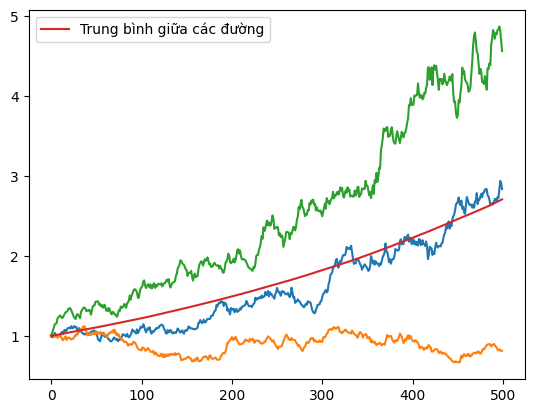

In [52]:
T=1
N=500 # Số bước 
M=10000 # Số kịch bản
dt=T/N
t=np.arange(0,1,dt)
dW = np.sqrt(dt)*np.random.randn(M,N)
W = np.cumsum(dW,axis=1)
mu=1
sigma=0.5
U=np.exp((mu-0.5*sigma**2)*t+sigma*W)
Umean = np.mean(U,axis=0)
plt.plot(U[:3].T) #Vẽ 5 đường
plt.plot(Umean,label="Trung bình giữa các đường")
plt.legend()
plt.show()

## Thực hành

In [55]:
ticker = "ACB"
start = "2013-01-01"
end = "2023-01-31"
vn_df = vn[ticker][(pd.Timestamp(start).date()<=vn.index.date)&(vn.index.date<=pd.Timestamp(end).date())]

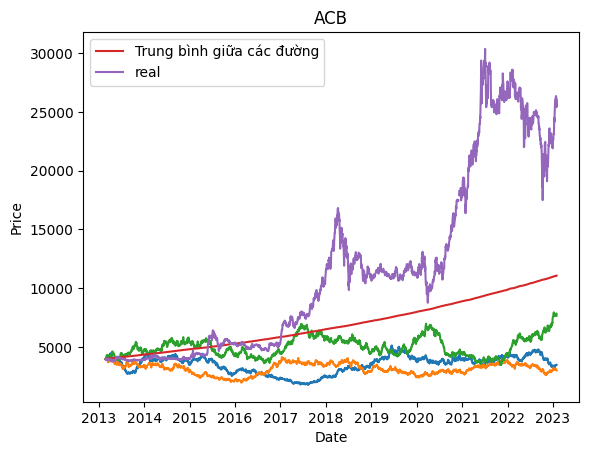

1.0001895589529752
0.7844331406724185


In [56]:
T=1
N=len(vn_df) # Số bước 
M=10000 # Số kịch bản
dt=T/N
t=np.arange(0,1,dt)
dW = np.sqrt(dt)*np.random.randn(M,N)
W = np.cumsum(dW,axis=1)

mu=np.cumsum(vn[ticker].pct_change()).mean()
sigma=np.cumsum(vn[ticker].pct_change()).std()

S0=vn_df.iloc[0,]
U=np.exp((mu-0.5*sigma**2)*t+sigma*W)

Umean = np.mean(U,axis=0)

plt.plot(vn_df.index,S0*U[:3].T) #Vẽ 5 đường
plt.plot(vn_df.index,S0*Umean,label="Trung bình giữa các đường")
plt.plot(vn_df,label="Real")
plt.title(f"{ticker}")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend()
plt.show()
print(mu)
print(sigma)